# **Lab 10.1 Vision Transformer**

In [1]:
import torch
from torch import nn
from torch.utils.data import Dataset
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, Subset
import torchvision
from torch.nn import functional as F
from torch.utils.tensorboard import SummaryWriter
from timm.scheduler.cosine_lr import CosineLRScheduler

from einops import rearrange
from einops.layers.torch import Rearrange

import random
import cv2
import numpy as np
from skimage.util import random_noise
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report

In [2]:
def imshow_grid(images, labels, class_names, mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]):
    num_images = len(images)
    num_rows = int(np.ceil(np.sqrt(num_images)))
    num_cols = int(np.ceil(num_images / num_rows))

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6),dpi=100)
    for i, ax in enumerate(axes.flat):
        if i < num_images:
            image = images[i].permute(1, 2, 0)
            label = labels[i].item()
            ax.imshow(torch.clamp(image,0,1),cmap='gray')
            ax.set_title(class_names[class_names.index(label)])
            ax.axis('off')
        else:
            ax.axis('off')  # Turn off empty subplots
    plt.tight_layout()
    plt.show()

Complete the `load_data()` function provided below.
`load_data()` will return `DataLoader()` and print the information about the Dataset.
This function must load only a pair of classes from the entire dataset.
Please ensure that the final image is in RGBscale and has a size of 224x224.

In [3]:
def load_data(path, class_names,batch_size=16,test=False):
    """
    Which augmentation should be used?
    """
    ### START CODE HERE ###




    ### END CODE HERE ###
    return data_loader

Use your `load_data()` function to load the dataset in the cell below. Then, display the image from the first batch.

<details>
<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical



```
📃Dataset:
	Number of images in class battleship: X
	Number of images in class patrol boat: X
	Number of images in class submarine: X
	Number of samples: 3X
```


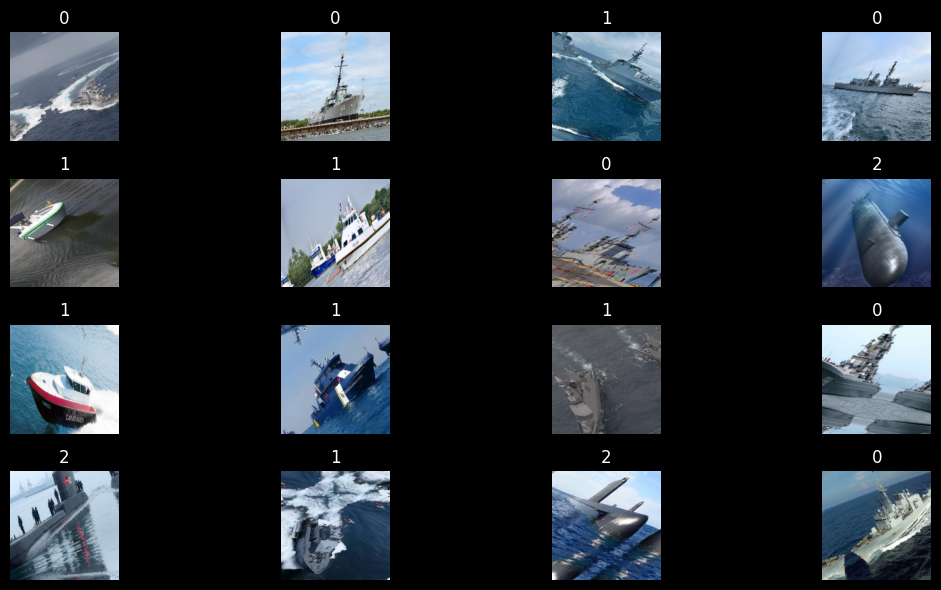

</details>


In [ ]:
### START CODE HERE ###


### END CODE HERE ###

**Create Models**

**SimpleViT:**
<details>
<summary>
<font size="3" color="orange">
<b>Expect SimpleViT</b>
</font>
</summary>

```
SimpleViT(
  (to_patch_embedding): Sequential(
    (0): Rearrange('b c (h p1) (w p2) -> b (h w) (p1 p2 c)', p1=16, p2=16)
    (1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    (2): Linear(in_features=768, out_features=512, bias=True)
    (3): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
  )
  (transformer): Transformer(
    (norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
    (layers): ModuleList(
      (0-5): 6 x ModuleList(
        (0): Attention(
          (norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
          (attend): Softmax(dim=-1)
          (to_qkv): Linear(in_features=512, out_features=1536, bias=False)
          (to_out): Linear(in_features=512, out_features=512, bias=False)
        )
        (1): FeedForward(
          (net): Sequential(
            (0): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
            (1): Linear(in_features=512, out_features=1024, bias=True)
            (2): GELU(approximate='none')
            (3): Linear(in_features=1024, out_features=512, bias=True)
          )
        )
      )
    )
  )
  (to_latent): Identity()
  (linear_head): Linear(in_features=512, out_features=3, bias=True)
)
```

</details>

A nice reference can be found here https://github.com/lucidrains/vit-pytorch/tree/main

In [6]:
def pair(t):
    return t if isinstance(t, tuple) else (t, t)

def posemb_sincos_2d(h, w, dim, temperature: int = 10000, dtype = torch.float32):
    y, x = torch.meshgrid(torch.arange(h), torch.arange(w), indexing="ij")
    assert (dim % 4) == 0, "feature dimension must be multiple of 4 for sincos emb"
    omega = torch.arange(dim // 4) / (dim // 4 - 1)
    omega = 1.0 / (temperature ** omega)

    y = y.flatten()[:, None] * omega[None, :]
    x = x.flatten()[:, None] * omega[None, :]
    pe = torch.cat((x.sin(), x.cos(), y.sin(), y.cos()), dim=1)
    return pe.type(dtype)


In [67]:
### START CODE HERE ###
class FeedForward(nn.Module):
    def __init__(self, dim, hidden_dim):
        super().__init__()
        pass
        
    def forward(self, x):
        pass

class Attention(nn.Module):
    def __init__(self, dim, heads = 8, dim_head = 64):
        super().__init__()
        pass

    def forward(self, x):
        pass

class Transformer(nn.Module):
    def __init__(self, dim, depth, heads, dim_head, mlp_dim):
        super().__init__()
        pass

    def forward(self, x):
        pass

class SimpleViT(nn.Module):
    def __init__(self, *, image_size, patch_size, num_classes, dim, depth, heads, mlp_dim, channels = 3, dim_head = 64):
        super().__init__()
        pass

    def forward(self, img):
        pass

### END CODE HERE ###

In [ ]:
model = SimpleViT(image_size=224, patch_size=16, num_classes=3, dim=512, depth=6, heads=8, mlp_dim=1024)
model

Complete the `train()` function in the cell below. This function should evaluate the model at every epoch, log the training loss/accuracy, test loss/accuracy, and display the feature map from all layers of the model at every epoch on TensorBoard. Additionally, it should save the model at the last epoch.

In [9]:
def train(model,opt,loss_fn,train_loader,test_loader,epochs=10,scheduler=None,writer=None,checkpoint_path=None,device='cpu'):
    ### START CODE HERE ###
    pass

    ### END CODE HERE ###

Let's train your model. Pls try to use `CosineLRScheduler()`

In [ ]:
### START CODE HERE ###
checkpoint_path = None
writer = None
model = SimpleViT(None)
opt = None
num_epochs = None
scheduler = CosineLRScheduler(None)
loss_fn = None
train(None)
### END CODE HERE ###


Display the confusion matrix and Classification Report
<details>
<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical
This is just an example of CNN. You should have 2 model : MLP, CNN.
```
              precision    recall  f1-score   support

           0       0.94      0.97      0.95        30
           1       0.93      0.90      0.92        30
           2       0.92      0.92      0.92        26

    accuracy                           0.93        86
   macro avg       0.93      0.93      0.93        86
weighted avg       0.93      0.93      0.93        86
```

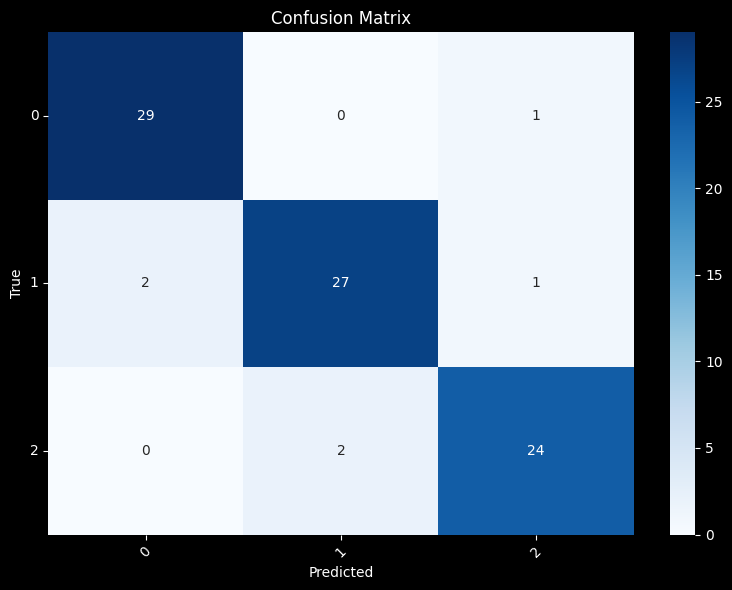

</details>

In [26]:
### START CODE HERE ###



### END CODE HERE ###

---

Question
1. How does varying the number of layers (depth) in the Transformer encoder affect the performance of the model?
2. How does CosineLRScheduler affect the convergence speed and the final performance compared to a fixed learning rate?
3. How do the high response regions in the attention maps correlate with the predicted label or classification result?
4. Discuss an example of incorrect prediction and the feature map of each attention layer. How does the feature map of each attention differ from those where the model correctly classifies the image?